In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cs-test.csv to cs-test.csv
Saving cs-training.csv to cs-training.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load datasets
train_data = pd.read_csv('/content/cs-training.csv').drop(columns=['Unnamed: 0'])
test_data = pd.read_csv('/content/cs-test.csv').drop(columns=['Unnamed: 0'])

In [ ]:
# data cleaning
train_data = train_data.drop_duplicates()

def percentage_missing(df):
    return df.isnull().mean().round(4) * 100

print("Missing values in training data (%):")
print(percentage_missing(train_data))

Missing values in training data (%):
SeriousDlqin2yrs                         0.00
RevolvingUtilizationOfUnsecuredLines     0.00
age                                      0.00
NumberOfTime30-59DaysPastDueNotWorse     0.00
DebtRatio                                0.00
MonthlyIncome                           19.56
NumberOfOpenCreditLinesAndLoans          0.00
NumberOfTimes90DaysLate                  0.00
NumberRealEstateLoansOrLines             0.00
NumberOfTime60-89DaysPastDueNotWorse     0.00
NumberOfDependents                       2.56
dtype: float64


In [ ]:
# Handle missing values
imputer_income = SimpleImputer(strategy='median')
imputer_dependents = SimpleImputer(strategy='constant', fill_value=0)

train_data['MonthlyIncome'] = imputer_income.fit_transform(train_data[['MonthlyIncome']])
train_data['NumberOfDependents'] = imputer_dependents.fit_transform(train_data[['NumberOfDependents']])

print("Missing values after imputation (%):")
print(percentage_missing(train_data))

Missing values after imputation (%):
SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64


In [ ]:
# Remove outliers
train_data = train_data[train_data['RevolvingUtilizationOfUnsecuredLines'] <= 10]

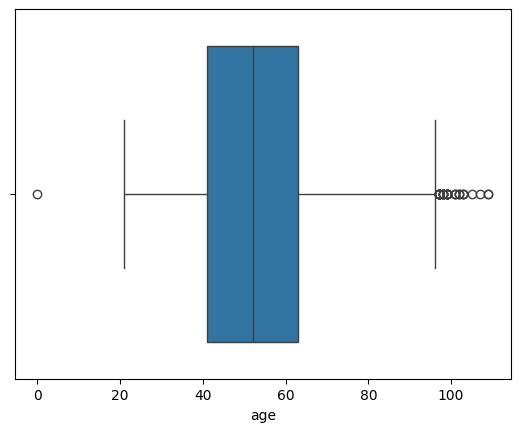

In [ ]:
# handle extremeties
sns.boxplot(x=train_data['age'])
plt.show()

In [ ]:
# Distribution of overdue counts
overdue_columns = ['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTimes90DaysLate']
for col in overdue_columns:
    print(f"Distribution of {col}:")
    print(train_data[col].value_counts())

Distribution of NumberOfTime30-59DaysPastDueNotWorse:
NumberOfTime30-59DaysPastDueNotWorse
0     125239
1      16020
2       4588
3       1750
4        747
5        342
98       220
6        140
7         54
8         25
9         12
96         5
10         4
12         2
13         1
11         1
Name: count, dtype: int64
Distribution of NumberOfTime60-89DaysPastDueNotWorse:
NumberOfTime60-89DaysPastDueNotWorse
0     141601
1       5723
2       1117
3        318
98       220
4        104
5         34
6         16
7          8
96         5
8          2
11         1
9          1
Name: count, dtype: int64
Distribution of NumberOfTimes90DaysLate:
NumberOfTimes90DaysLate
0     140875
1       5227
2       1554
3        666
4        291
98       220
5        131
6         80
7         38
8         20
9         19
10         8
96         5
11         5
13         4
15         2
14         2
12         2
17         1
Name: count, dtype: int64


In [ ]:
# Handle extreme values in DebtRatio
scaler = StandardScaler()
train_data['DebtRatio'] = scaler.fit_transform(train_data[['DebtRatio']])

In [ ]:
# Prepare data for modeling
X = train_data.drop(columns=['SeriousDlqin2yrs'])
y = train_data['SeriousDlqin2yrs']

In [ ]:
# Train and evaluate model
model = XGBClassifier(tree_method='exact')
model.fit(X, y)
y_pred = model.predict(X)

In [ ]:
print("Model Accuracy:", accuracy_score(y, y_pred))

Model Accuracy: 0.9464901106268857


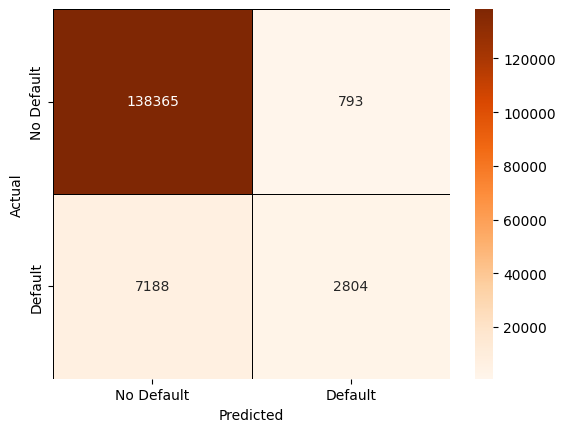

In [ ]:
# Confusion matrix
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', linewidths=0.5, linecolor='black')
plt.xticks(ticks=np.arange(2)+.5, labels=['No Default', 'Default'])
plt.yticks(ticks=np.arange(2)+.5, labels=['No Default', 'Default'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Classification report
print("Classification Report:")
print(classification_report(y, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97    139158
           1       0.78      0.28      0.41      9992

    accuracy                           0.95    149150
   macro avg       0.87      0.64      0.69    149150
weighted avg       0.94      0.95      0.93    149150



Missing values in training data (%):
SeriousDlqin2yrs                         0.00
RevolvingUtilizationOfUnsecuredLines     0.00
age                                      0.00
NumberOfTime30-59DaysPastDueNotWorse     0.00
DebtRatio                                0.00
MonthlyIncome                           19.56
NumberOfOpenCreditLinesAndLoans          0.00
NumberOfTimes90DaysLate                  0.00
NumberRealEstateLoansOrLines             0.00
NumberOfTime60-89DaysPastDueNotWorse     0.00
NumberOfDependents                       2.56
dtype: float64
Missing values after imputation (%):
SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfT

<ipython-input-18-729db3cabe76>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['MonthlyIncome'] = imputer_income.fit_transform(train_data[['MonthlyIncome']])
<ipython-input-18-729db3cabe76>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['NumberOfDependents'] = imputer_dependents.fit_transform(train_data[['NumberOfDependents']])


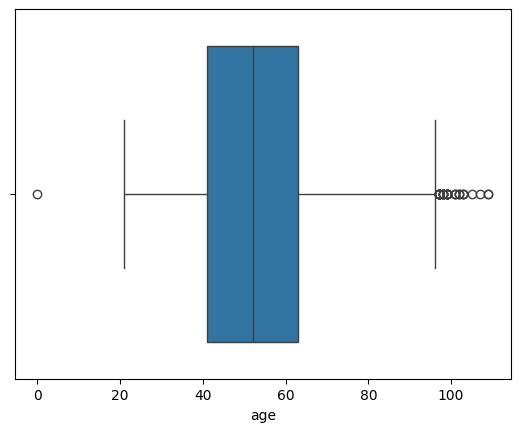

Cross-Validation Accuracy Scores: [0.81930942 0.82246061 0.8237345  0.82034864 0.83027154]
Average Cross-Validation Accuracy: 0.8232249413342272
Validation Accuracy: 0.8238015420717398


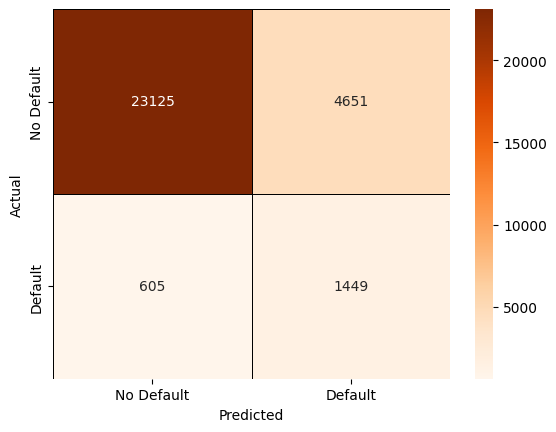

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.83      0.90     27776
           1       0.24      0.71      0.36      2054

    accuracy                           0.82     29830
   macro avg       0.61      0.77      0.63     29830
weighted avg       0.92      0.82      0.86     29830



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

# Load datasets
train_data = pd.read_csv('/content/cs-training.csv').drop(columns=['Unnamed: 0'])
test_data = pd.read_csv('/content/cs-test.csv').drop(columns=['Unnamed: 0'])

# Remove duplicate rows
train_data = train_data.drop_duplicates()

# Check for missing values
def percentage_missing(df):
    return df.isnull().mean().round(4) * 100

print("Missing values in training data (%):")
print(percentage_missing(train_data))

# Impute missing values
imputer_income = SimpleImputer(strategy='median')
imputer_dependents = SimpleImputer(strategy='constant', fill_value=0)

train_data['MonthlyIncome'] = imputer_income.fit_transform(train_data[['MonthlyIncome']])
train_data['NumberOfDependents'] = imputer_dependents.fit_transform(train_data[['NumberOfDependents']])

print("Missing values after imputation (%):")
print(percentage_missing(train_data))

# Remove outliers in RevolvingUtilizationOfUnsecuredLines
train_data = train_data[train_data['RevolvingUtilizationOfUnsecuredLines'] <= 10]

# Explore distributions and handle extreme values
sns.boxplot(x=train_data['age'])
plt.show()

# Scaling DebtRatio
scaler = StandardScaler()
train_data['DebtRatio'] = scaler.fit_transform(train_data[['DebtRatio']])

# Prepare data for modeling
X = train_data.drop(columns=['SeriousDlqin2yrs'])
y = train_data['SeriousDlqin2yrs']

# Split data for cross-validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train XGBClassifier with class weights
model = XGBClassifier(tree_method='exact', scale_pos_weight=(len(y) - sum(y)) / sum(y))
model.fit(X_train, y_train)

# Evaluate with cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Average Cross-Validation Accuracy:", cv_scores.mean())

# Predict and evaluate on validation set
y_pred = model.predict(X_valid)
print("Validation Accuracy:", accuracy_score(y_valid, y_pred))

# Confusion matrix
cm = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', linewidths=0.5, linecolor='black')
plt.xticks(ticks=np.arange(2)+.5, labels=['No Default', 'Default'])
plt.yticks(ticks=np.arange(2)+.5, labels=['No Default', 'Default'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_valid, y_pred))

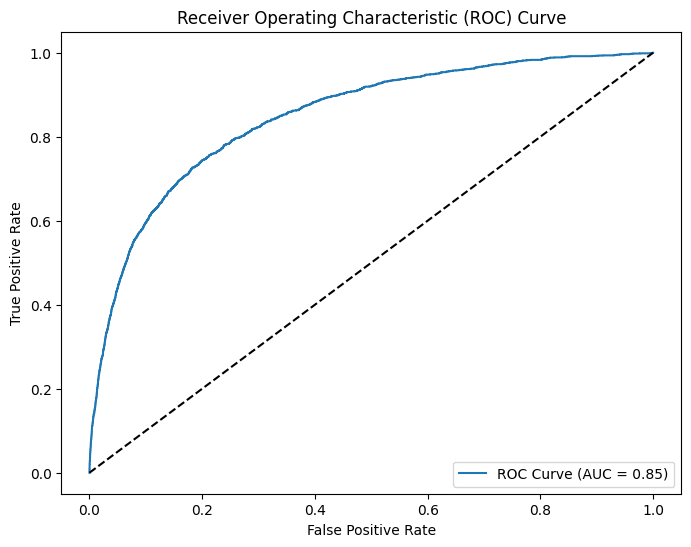

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curve and AUC
y_proba = model.predict_proba(X_valid)[:, 1]
fpr, tpr, thresholds = roc_curve(y_valid, y_proba)
auc = roc_auc_score(y_valid, y_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

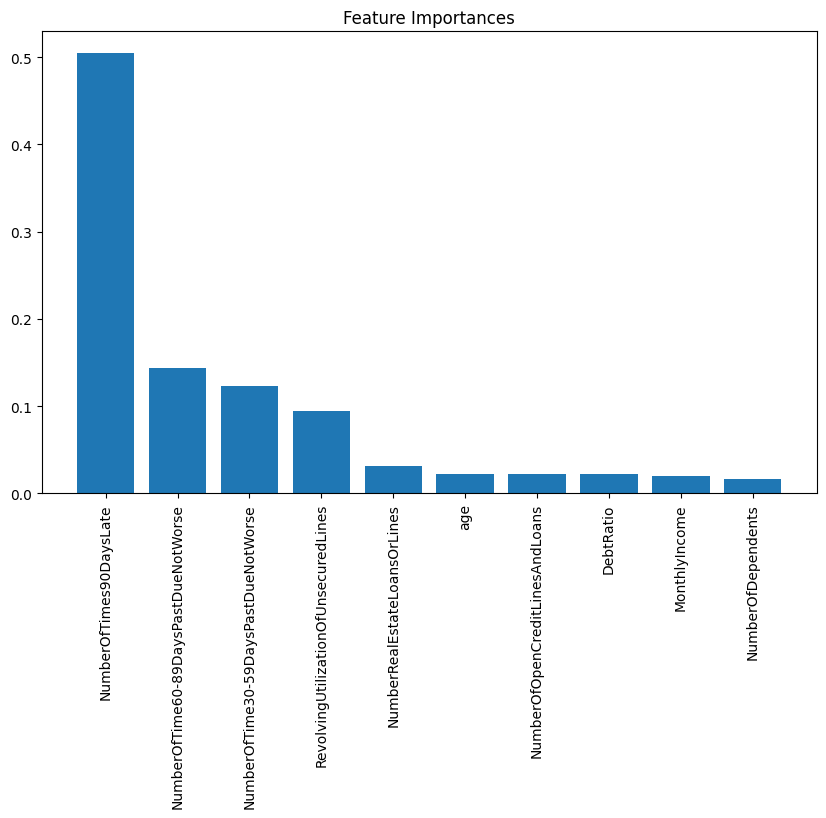

In [ ]:
# Fit model to get feature importances
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
feature_names = X_train.columns
sorted_idx = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[sorted_idx], align='center')
plt.xticks(range(len(importances)), np.array(feature_names)[sorted_idx], rotation=90)
plt.title('Feature Importances')
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train model on resampled data
model.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
from imblearn.over_sampling import ADASYN

# Apply ADASYN to training data
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

# Train model on resampled data
model.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Define base models and meta-model
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=100, random_state=42))
]
meta_model = LogisticRegression()

# Initialize StackingClassifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Train stacking model
stacking_model.fit(X_train, y_train)

# Evaluate stacking model
y_pred = stacking_model.predict(X_valid)
print("Stacking Model Accuracy:", accuracy_score(y_valid, y_pred))

Stacking Model Accuracy: 0.9337914850821321


In [ ]:
from sklearn.model_selection import StratifiedKFold

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_results = []
for train_index, valid_index in skf.split(X, y):
    X_train_cv, X_valid_cv = X.iloc[train_index], X.iloc[valid_index]
    y_train_cv, y_valid_cv = y.iloc[train_index], y.iloc[valid_index]

    model.fit(X_train_cv, y_train_cv)
    y_pred_cv = model.predict(X_valid_cv)
    cv_results.append(accuracy_score(y_valid_cv, y_pred_cv))

print("Cross-Validation Accuracy Scores:", cv_results)
print("Average Cross-Validation Accuracy:", np.mean(cv_results))

Cross-Validation Accuracy Scores: [0.935936976198458, 0.9357023131076098, 0.9346630908481395, 0.935601743211532, 0.9352329869259135]
Average Cross-Validation Accuracy: 0.9354274220583306
